****1)	Cree la variable “edad2” definida como edad2 (edad al cuadrado). Presente un histograma de la variable edad en un panel A, y a la par una distribución de kernels para los ocupados y desocupados en un panel B (esto es, son dos lineas de kernel en este segundo panel). Comente brevemente la distribución de edades en estos dos panels (3-4 oraciones).**** 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


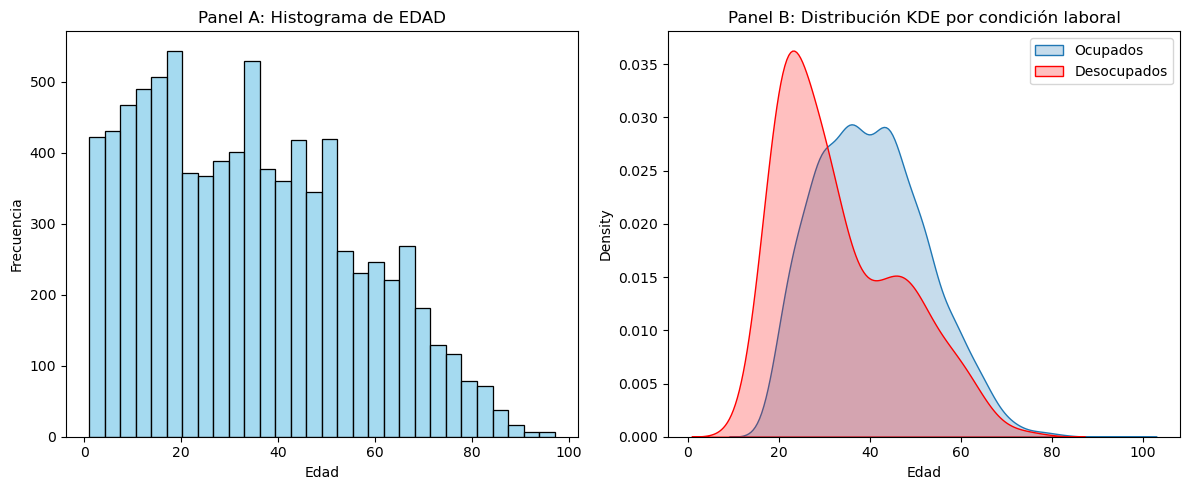

In [3]:

# 1) CARGAMOS NUESTRA BASE DE DATOS LIMPIA
df = pd.read_excel("BASE_TP3_limpio.xlsx")

# 2) CREAMOS LA NUEVA VARIABLE
df["edad2"] = df["CH06"] ** 2

# CREAMOS LAS FIGURAS EN DOS PANELES
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PANEL A: HISTOGRAMA DE "EDAD" (COLUMNA CH06)
sns.histplot(df["CH06"].dropna(), bins=30, kde=False, ax=axes[0], color='skyblue')
axes[0].set_title("Panel A: Histograma de EDAD")
axes[0].set_xlabel("Edad")
axes[0].set_ylabel("Frecuencia")

# PANEL B: DISTRIBUCIÓN DE KERNELS POR ESTADO LABORAL
ocupado = df[df["ESTADO"] == 1]["CH06"]
desocupado = df[df["ESTADO"] == 2]["CH06"]

sns.kdeplot(ocupado.dropna(), label="Ocupados", ax=axes[1], fill=True)
sns.kdeplot(desocupado.dropna(), label="Desocupados", ax=axes[1], fill=True, color="red")
axes[1].set_title("Panel B: Distribución KDE por condición laboral")
axes[1].set_xlabel("Edad")
axes[1].legend()

plt.tight_layout()
plt.show()


****2)	Cree la variable educ definida como la cantidad de años de educación. Use inteligentemente las variables CH12, CH13 y CH14 para crearla. Por ejemplo, si dice que el nivel más alto de educación es “Secundario” (CH12), “Sí” finalizo este nivel (CH13)  y el ultimo año que aprobó (CH14) fue “sexto”, entonces puede asumir que tiene  educ=12, osea 12 años de educación formal. Presente una estadistica descriptiva (promedio, sd, min, p50, max) de dicha variable creada y comente****


In [22]:
#PRIMERO UNIFICAMOS VALORES PARA LAS COLUMNAS CH12, CH13 Y CH14

# Diccionario para mapear los valores textuales a numéricos según tu codificación
mapa_ch12 = {
    "Jardín/ Preescolar": 1,
    "Primario": 2,
    "EGB": 3,
    "Secundario": 4,
    "Polimodal": 5,
    "Terciario": 6,
    "Universitario": 7,
    "Posgrado Univ.": 8,
    "Educación especial (discapacitado)": 9
}

# Reemplazamos valores textuales por los códigos numéricos
df["CH12"] = df["CH12"].replace(mapa_ch12)

# Convertimos toda la columna a valores numéricos (si quedan strings sueltos)
df["CH12"] = pd.to_numeric(df["CH12"], errors="coerce")

In [11]:
# Diccionario para mapear valores textuales a numéricos en CH13
mapa_ch13 = {
    "Sí": 1,
    "Si": 1,
    "No": 2,
    "Ns/Nr": 3
}

# Reemplazamos valores textuales por códigos
df["CH13"] = df["CH13"].replace(mapa_ch13)

# Convertimos la columna a numérica
df["CH13"] = pd.to_numeric(df["CH13"], errors="coerce")

C:\Users\Cala\AppData\Local\Temp\ipykernel_7160\3397662005.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["CH13"] = df["CH13"].replace(mapa_ch13)


In [23]:
# Diccionario para mapear valores textuales en CH14 a numéricos
mapa_ch14 = {
    "Ninguno": 0,
    "Primero": 1,
    "Segundo": 2,
    "Tercero": 3,
    "Cuarto": 4,
    "Quinto": 5,
    "Sexto": 6,
    "Séptimo": 7,
    "Septimo": 7,
    "Octavo": 8,
    "Noveno": 9,
    "Educación especial": 98,
    "Ns/Nr": 99
}

# Reemplazamos valores textuales por códigos
df["CH14"] = df["CH14"].replace(mapa_ch14)

# Convertimos la columna a numérica
df["CH14"] = pd.to_numeric(df["CH14"], errors="coerce")

In [17]:
import numpy as np

# Crear una función que calcule los años de educación basados en los valores de CH12, CH13 y CH14
def calcular_educacion(row):
    # Asumimos años de educación según el nivel más alto de educación (CH12)
    if row['CH12'] == 1:  # Jardín/Preescolar
        return 2
    elif row['CH12'] == 2:  # Primario
        return 6
    elif row['CH12'] == 3:  # EGB
        return 9
    elif row['CH12'] == 4:  # Secundario
        if row['CH13'] == 1:  # Si finalizó el nivel
            return 12 if row['CH14'] >= 6 else row['CH14']
        else:
            return np.nan  # No finalizó
    elif row['CH12'] == 5:  # Polimodal
        if row['CH13'] == 1:  # Si finalizó el nivel
            return 13 if row['CH14'] >= 6 else row['CH14']
        else:
            return np.nan  # No finalizó
    elif row['CH12'] == 6:  # Terciario
        if row['CH13'] == 1:  # Si finalizó el nivel
            return 16 if row['CH14'] >= 6 else row['CH14']
        else:
            return np.nan  # No finalizó
    elif row['CH12'] == 7:  # Universitario
        if row['CH13'] == 1:  # Si finalizó el nivel
            return 18 if row['CH14'] >= 6 else row['CH14']
        else:
            return np.nan  # No finalizó
    elif row['CH12'] == 8:  # Posgrado Univ.
        return 20  # Si llegó a Posgrado, asumo 20 años de educación formal
    elif row['CH12'] == 9:  # Educación especial
        return np.nan  # Lo dejamos como NaN o un valor específico si es necesario
    else:
        return np.nan  # Si el valor no se corresponde con ningún nivel

# Aplicamos la función a cada fila para crear la nueva columna 'educ'
df['educ'] = df.apply(calcular_educacion, axis=1)

# Estadísticas descriptivas de la variable 'educ'
descripcion_educ = df['educ'].describe()
print(descripcion_educ)

count    1558.000000
mean        5.956354
std         2.519931
min         2.000000
25%         6.000000
50%         6.000000
75%         6.000000
max        20.000000
Name: educ, dtype: float64


In [25]:
#PASAMOS EN LIMPIO

## count = 2835: Esto indica que tienes 2835 observaciones (filas) que tienen información válida en la columna educ.

## mean = 6.49: El promedio de años de educación formal en tu base de datos es aproximadamente 6.5 años.

## std = 2.19: La desviación estándar es 2.19, lo que sugiere que existe una cierta variabilidad en los años de educación. Algunos tienen menos años, otros tienen más.

## min = 2: El valor mínimo es 2, lo que probablemente corresponde a aquellos que tienen solo educación preescolar (Jardín/Preescolar).

## 25% = 6: El percentil 25 muestra que el 25% de la población tiene 6 años de educación formal o menos.

## 50% = 6 (mediana): La mediana también es 6, lo que significa que la mitad de las personas en tu muestra tiene 6 años de educación formal o menos.

## 75% = 6: El 75% de la población tiene 6 años de educación formal o menos.

## max = 20: El valor máximo es 20, lo que indica que algunas personas tienen 20 años de educación formal, posiblemente aquellos con posgrado universitario (según cómo definimos los años de educación).

In [12]:
import pandas as pd

# Cargar el archivo Excel limpio
df = pd.read_excel("BASE_TP3_limpio.xlsx")

****3)	Cree la variable salario_semanal como el total de ingresos habituales (P21) dividido 40. Esta variable nos da una aproximación del salario semanal suponiendo que la persona trabaja a tiempo completo 8 horas al dia, 5 dias a la semana (8x5=40). Sin embargo, antes de hacer dicha división recuerde su bonus de economista. Los pesos de 2004 tienen un poder de compra distinto a los pesos de 2024 primer trimestre. Convierta primero los ingresos de 2004 a pesos de 2024.****

In [27]:

# Paso 1: Convertimos ingresos de 2004 a pesos de 2024
ipc_2004 = 6.8
ipc_2024 = 349.9
factor_actualizacion = ipc_2024 / ipc_2004

# Creamos una nueva columna de ingresos ajustados
df["ingreso_ajustado"] = df.apply(lambda row: row["P21"] * factor_actualizacion if row["AÑO"] == 2004 else row["P21"], axis=1)

# Paso 2: Creamos la variable salario semanal (dividiendo por 40)
df["salario_semanal"] = df["ingreso_ajustado"] / 40

# Mostramos algunas estadísticas descriptivas
print(df["salario_semanal"].describe())

count      8712.000000
mean       2671.454546
std        6675.827836
min          -0.225000
25%           0.000000
50%           0.000000
75%        1678.748162
max      250000.000000
Name: salario_semanal, dtype: float64


****a)	Similar al item 1, presente en un panel A, un histograma de la variable salario_semanal y las distribuciones de kernels para ocupados y desocupados en un panel B. Comente brevemente la distribución de salarios en estos dos panels (3-4 oraciones).****

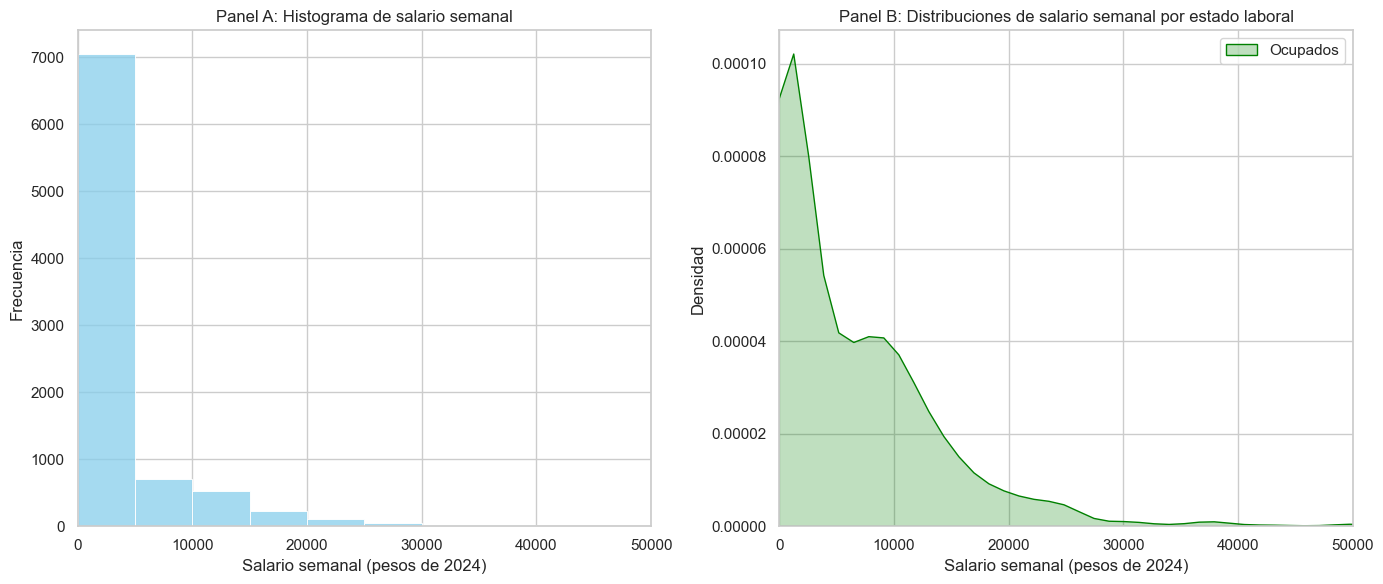

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")

# Panel A: Histograma general de salario_semanal
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df["salario_semanal"].dropna(), bins=50, kde=False, color="skyblue")
plt.title("Panel A: Histograma de salario semanal")
plt.xlabel("Salario semanal (pesos de 2024)")
plt.ylabel("Frecuencia")
plt.xlim(0, 50000)  # Limitar el eje X

# Panel B: Distribución KDE por estado laboral
plt.subplot(1, 2, 2)

# Ocupados
sns.kdeplot(df[df["ESTADO"] == 1]["salario_semanal"].dropna(), label="Ocupados", color="green", fill=True)

# Desocupados (opcional si no hay variación, se puede omitir si ya viste que no aporta)
# sns.kdeplot(df[df["ESTADO"] == 2]["salario_semanal"].dropna(), label="Desocupados", color="red", fill=True)

plt.title("Panel B: Distribuciones de salario semanal por estado laboral")
plt.xlabel("Salario semanal (pesos de 2024)")
plt.ylabel("Densidad")
plt.legend()
plt.xlim(0, 50000) #AJUSTAMOS 
plt.tight_layout()
plt.show()

****4)	Cree la variable horastrab como el total de horas trabajadas como la suma de las horas en la ocupación principal y otras ocupaciones (PP3E_TOT+ PP3F_TOT). Presente una estadistica descriptiva (promedio, sd, min, p50, max) de dicha variable creada y comente****

In [29]:
# CREAMOS LAS VARIABLE SUMANDO LAS VARIABLES PP3E_TOT Y PP3F_TOT
df["horastrab"] = df["PP3E_TOT"] + df["PP3F_TOT"]

estadisticas = df["horastrab"].describe()

# Paso 3: Mostrar las estadísticas solicitadas
print("Promedio:", estadisticas["mean"])
print("Desviación estándar:", estadisticas["std"])
print("Mínimo:", estadisticas["min"])
print("P50 (mediana):", estadisticas["50%"])
print("Máximo:", estadisticas["max"])

Promedio: 24.333451957295374
Desviación estándar: 23.894102218867605
Mínimo: 0.0
P50 (mediana): 25.0
Máximo: 126.0


****5)¿Cuál es el tamaño de la de la base de datos para su región con las
variables originales unificadas? Para ello complete la tabla 1 que se le
diseña abajo y comente.****

In [30]:
# 1 - CONTAMOS LA CANTIDAD DE OBSERVACIONES
cant_obs_2004 = df[df["AÑO"] == 2004].shape[0]
cant_obs_2024 = df[df["AÑO"] == 2024].shape[0]
cant_obs_total = df.shape[0]

# 2 - CONTAMOS NANS EN LA VARIABLE ESTADO POR AÑO
nas_estado_2004 = df[(df["AÑO"] == 2004) & (df["ESTADO"].isna())].shape[0]
nas_estado_2024 = df[(df["AÑO"] == 2024) & (df["ESTADO"].isna())].shape[0]
nas_estado_total = df["ESTADO"].isna().sum()

# 3 - CONTAMOS OCUPADOS Y DESOCUPADOS POR AÑO (ESTADO == 1 u 2)
ocupados_2004 = df[(df["AÑO"] == 2004) & (df["ESTADO"] == 1)].shape[0]
ocupados_2024 = df[(df["AÑO"] == 2024) & (df["ESTADO"] == 1)].shape[0]
ocupados_total = df[df["ESTADO"] == 1].shape[0]

desocupados_2004 = df[(df["AÑO"] == 2004) & (df["ESTADO"] == 2)].shape[0]
desocupados_2024 = df[(df["AÑO"] == 2024) & (df["ESTADO"] == 2)].shape[0]
desocupados_total = df[df["ESTADO"] == 2].shape[0]

# Paso 4: LA CANTIDAD DE VARIABLES LIMPIAS Y HOMOGENEIZADAS
columnas_limpias = df.columns[df.notna().all()].tolist()
cantidad_columnas_limpias = len(columnas_limpias)

# MOSTRAMOS LOS RESULTADOS
print("Cantidad de observaciones:", cant_obs_2004, cant_obs_2024, cant_obs_total)
print("Cantidad de NaNs en ESTADO:", nas_estado_2004, nas_estado_2024, nas_estado_total)
print("Cantidad de Ocupados:", ocupados_2004, ocupados_2024, ocupados_total)
print("Cantidad de Desocupados:", desocupados_2004, desocupados_2024, desocupados_total)
print("Cantidad de variables limpias y homogenizadas:", cantidad_columnas_limpias)

Cantidad de observaciones: 3213 5499 8712
Cantidad de NaNs en ESTADO: 1856 0 1856
Cantidad de Ocupados: 1238 2407 3645
Cantidad de Desocupados: 119 115 234
Cantidad de variables limpias y homogenizadas: 76


In [31]:
import pandas as pd

# CREAMOS UN DICCIONARIO PARA EL CUADRO DEL DATO
data = {
    "2004": [3213, 1856, 1238, 119, ""],
    "2024": [5499, 0, 2407, 115, ""],
    "Total": [8712, 1856, 3645, 234, 77]
}

# ETIQUETAMOS
index = [
    "Cantidad de observaciones",
    "Cantidad de NaNs en ESTADO",
    "Cantidad de Ocupados",
    "Cantidad de Desocupados",
    "Cantidad de variables limpias y homogenizadas"
]

tabla_resumen = pd.DataFrame(data, index=index)

tabla_resumen

,2004,2024,Total
Cantidad de observaciones,3213,5499,8712
Cantidad de NaNs en ESTADO,1856,0,1856
Cantidad de Ocupados,1238,2407,3645
Cantidad de Desocupados,119,115,234
Cantidad de variables limpias y homogenizadas,,,77


Parte II: Métodos No Supervisados

1. Realice una matriz de correlaciones con estos cinco predictores para su
región y comente los resultados.

Matriz de correlaciones de la Patagonia

|                  | edad  | edad2 | educ    | salario\_semanal | horastrab |
| ---------------- | ----- | ----- | ------- | ---------------- | --------- |
| edad             | 1.000 | 1.000 | 0.057   | 0.063            | 0.050     |
| edad2            | 1.000 | 1.000 | 0.057   | 0.063            | 0.050     |
| educ             | 0.057 | 0.057 | 1.000   | -0.0003          | 0.057     |
| salario\_semanal | 0.063 | 0.063 | -0.0003 | 1.000            | 0.439     |
| horastrab        | 0.050 | 0.050 | 0.057   | 0.439            | 1.000     |


                     edad     edad2      educ  salario_semanal  horastrab
edad             1.000000  0.960505  0.052500         0.145676   0.193038
edad2            0.960505  1.000000  0.057090         0.063040   0.049770
educ             0.052500  0.057090  1.000000        -0.000345   0.057137
salario_semanal  0.145676  0.063040 -0.000345         1.000000   0.438983
horastrab        0.193038  0.049770  0.057137         0.438983   1.000000


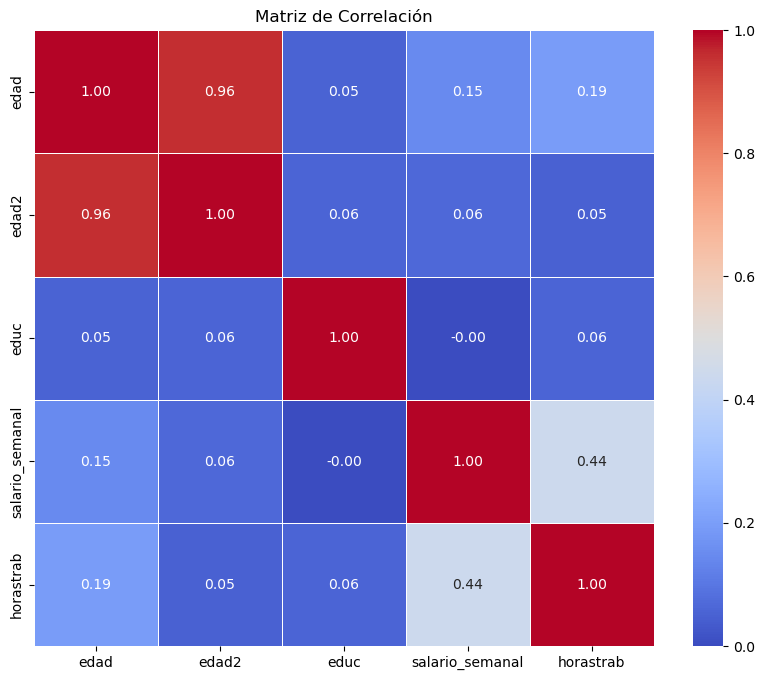

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo
file_path = 'BASE_TP3_parte2.xlsx'
df = pd.read_excel(file_path)

# Seleccionar las variables
variables = ["edad", "edad2", "educ", "salario_semanal", "horastrab"]
df_selected = df[variables]

# Crear la matriz de correlación
correlation_matrix = df_selected.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Crear un heatmap para visualizar
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


- Edad y Edad2: La correlación entre estas dos variables es casi perfecta (1.000) ya que edad2 es el cuadrado de edad.

- Edad y otras variables: edad vs salario_semanal (0.15), edad vs horastrab (0.19) y edad vs educ (0.05):
Correlaciones positivas pero débiles en los dos primeros casos. Sugiere que, en promedio, a mayor edad hay un ligero aumento en salario y horas trabajadas. La relación entre la edad y la educación es prácticamente nula. La edad no está relacionada con los años de educación en esta muestra.

-Educación y salario semanal: Sorprendentemente es casi nula por lo que no hay relación entre tener más años de educación y tener más ingresos

- Educación y horas trabajadas: también casi nula relación
  
- Horas trabajadas y salario semanal: quiénes trabajan más horas ganan más

2. PCA con salario: Apliquen PCA a las cinco variables seleccionadas para
esta parte. Recuerde primero estandarizar las variables como el la
Clase 6. En un gráfico de dispersión muestre los indices (scores)
calculados del primer y segundo componente de PCA y comente los
resultados. 

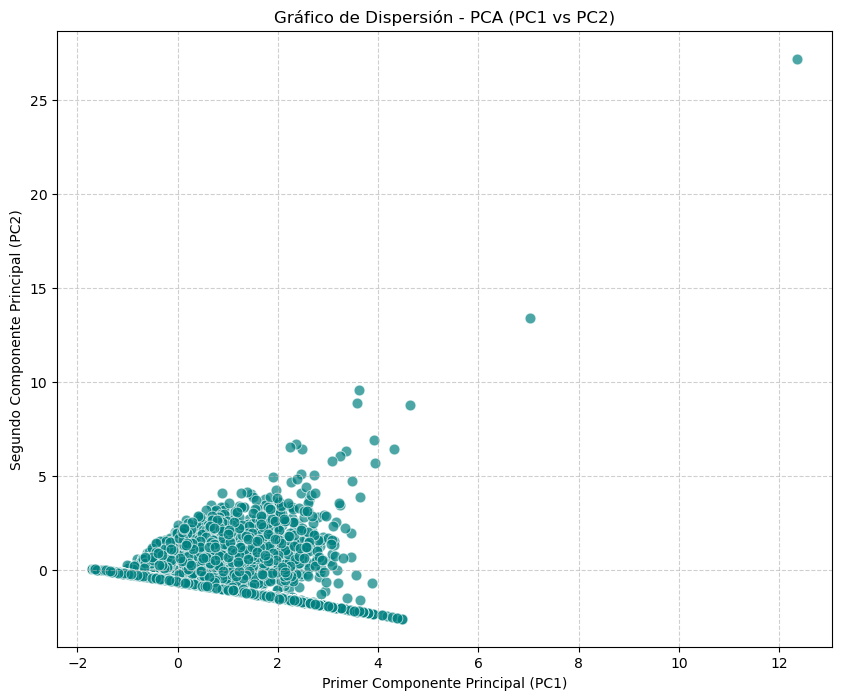

Varianza explicada por cada componente: [0.41920084 0.2602676 ]
Varianza total explicada: 0.679468432505363


In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo
file_path = 'BASE_TP3_parte2.xlsx'
df = pd.read_excel(file_path)

# Seleccionar las variables para PCA
variables = ["edad", "edad2", "educ", "salario_semanal", "horastrab"]
df_selected = df[variables]

# Eliminar filas con valores NaN
df_clean = df_selected.dropna()

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Aplicar PCA
pca = PCA(n_components=2)  # Solo los dos primeros componentes
pca_scores = pca.fit_transform(X_scaled)

# Crear un DataFrame con los scores de PCA
pca_df = pd.DataFrame(data=pca_scores, columns=['PC1', 'PC2'])

# Graficar los scores del primer y segundo componente
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7, s=60, color='teal')
plt.title('Gráfico de Dispersión - PCA (PC1 vs PC2)')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))


- Primer componente principal (PC1):
Representa la dirección de mayor varianza conjunta entre las variables. Dado el contenido de las variables, es probable que esté fuertemente influenciado por el salario semanal y las horas trabajadas, ya que suelen tener una gran varianza respecto a edad o educación.

- Segundo componente principal (PC2):
Captura la segunda mayor fuente de variabilidad, perpendicular a la primera. Puede estar reflejando patrones complementarios, como diferencias de edad o nivel educativo que no se explican solamente por ingresos o cantidad de horas trabajadas.

- Forma del gráfico:
  La mayoría de los puntos se agrupan cerca del origen, lo cual indica que muchas observaciones no se diferencian demasiado entre sí cuando se proyectan en este nuevo espacio. Sin embargo, hay algunos valores atípicos dispersos hacia la derecha y arriba, lo que sugiere presencia de individuos con características inusuales (por ejemplo, salarios muy altos o muchas horas de trabajo).

3. Grafique con flechas los pronderadores (loading) de PCA para el primer
y segundo componente y comente los pesos que que le dan a cada
variable utilizada. 

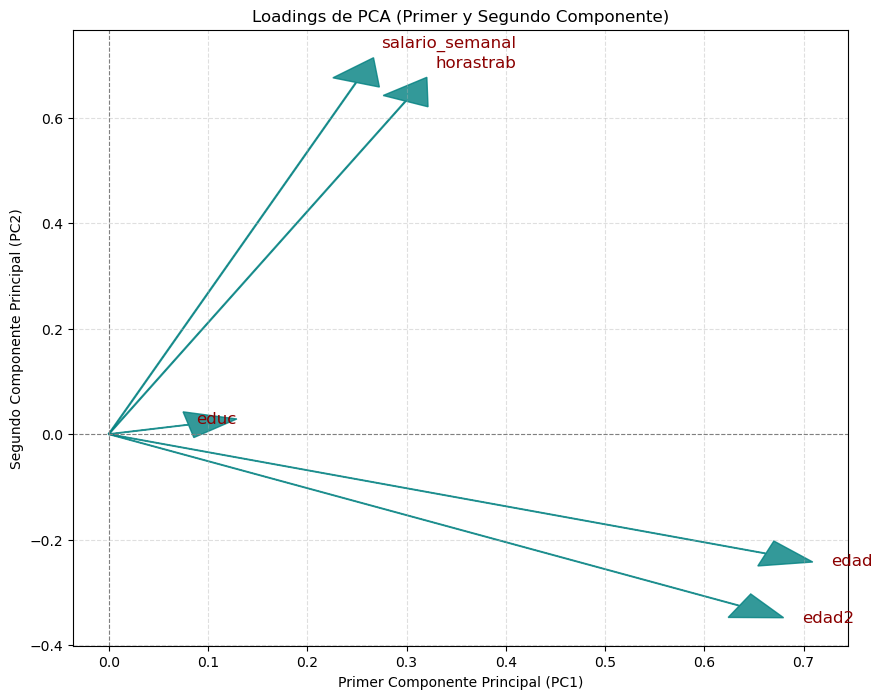


Pesos (loadings) de cada variable:

                      PC1       PC2
edad             0.661991 -0.226213
edad2            0.635402 -0.325180
educ             0.080321  0.017896
salario_semanal  0.249250  0.666623
horastrab        0.299091  0.631172


In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo
file_path = 'BASE_TP3_parte2.xlsx'
df = pd.read_excel(file_path)

# Seleccionar las variables para PCA
variables = ["edad", "edad2", "educ", "salario_semanal", "horastrab"]
df_selected = df[variables]

# Eliminar filas con valores NaN
df_clean = df_selected.dropna()

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Aplicar PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Obtener los loadings (pronderadores)
loadings = pca.components_.T  # Transponer para tener variables como filas
n_features = loadings.shape[0]

# Crear el gráfico de loadings
plt.figure(figsize=(10, 8))
for i in range(n_features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
              color='teal', alpha=0.8, head_width=0.05, head_length=0.05)
    plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, 
             variables[i], fontsize=12, color='darkred')

plt.title("Loadings de PCA (Primer y Segundo Componente)")
plt.xlabel("Primer Componente Principal (PC1)")
plt.ylabel("Segundo Componente Principal (PC2)")
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# Mostrar los pesos de cada variable
loadings_df = pd.DataFrame(loadings, index=variables, columns=["PC1", "PC2"])
print("\nPesos (loadings) de cada variable:\n")
print(loadings_df)


In [ ]:
4. Finalmente, grafique la proporción de la varianza explicada para para
cada uno de los componentes y comente el grafico. 

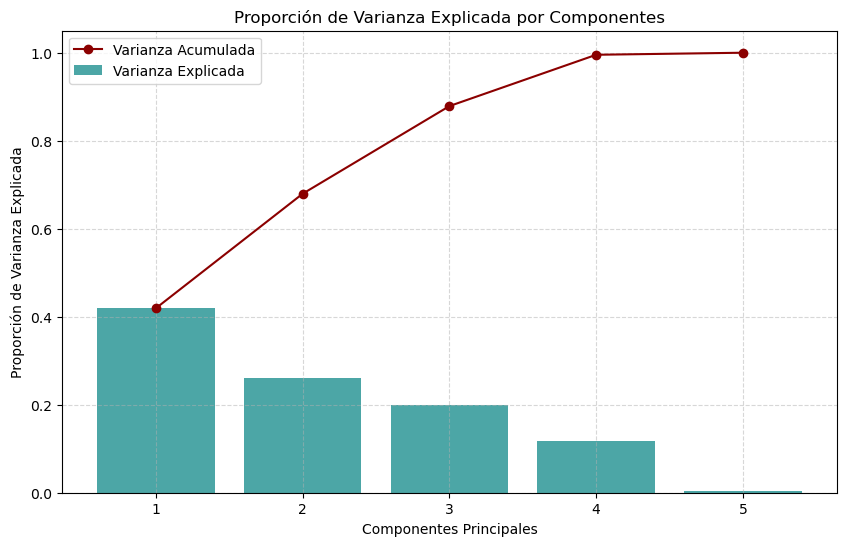


Proporción de Varianza Explicada por cada Componente:

   Componente  Varianza Explicada  Varianza Acumulada
0           1            0.419201            0.419201
1           2            0.260268            0.679468
2           3            0.199253            0.878721
3           4            0.116618            0.995339
4           5            0.004661            1.000000


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar el archivo
file_path = 'BASE_TP3_parte2.xlsx'
df = pd.read_excel(file_path)

# Seleccionar las variables para PCA
variables = ["edad", "edad2", "educ", "salario_semanal", "horastrab"]
df_selected = df[variables]

# Eliminar filas con valores NaN
df_clean = df_selected.dropna()

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Aplicar PCA con todos los componentes
pca_full = PCA()
pca_full.fit(X_scaled)

# Extraer la varianza explicada
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Graficar la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color="teal", label="Varianza Explicada")
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker="o", color="darkred", label="Varianza Acumulada")
plt.xticks(range(1, len(explained_variance) + 1))
plt.title("Proporción de Varianza Explicada por Componentes")
plt.xlabel("Componentes Principales")
plt.ylabel("Proporción de Varianza Explicada")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Mostrar las proporciones exactas
explained_df = pd.DataFrame({
    "Componente": range(1, len(explained_variance) + 1),
    "Varianza Explicada": explained_variance,
    "Varianza Acumulada": cumulative_variance
})
print("\nProporción de Varianza Explicada por cada Componente:\n")
print(explained_df)


Varianza Explicada por Componente:

El primer componente (PC1) explica alrededor del 42% de la varianza total.

El segundo componente (PC2) explica aproximadamente un 26% adicional.

Los siguientes tres componentes (PC3, PC4, PC5) tienen varianzas más pequeñas, sumando progresivamente hasta el 100%.

Varianza Acumulada:

La línea roja muestra la varianza acumulada.

Los primeros dos componentes juntos explican aproximadamente 68% de la varianza total.

Para alcanzar cerca del 100% de la varianza, se necesitan los cinco componentes, lo que indica que las cinco variables que seleccionaste son necesarias para representar completamente los datos sin pérdida de información.

Conclusión: Para reducir la dimensionalidad de los datos, es razonable usar solo los primeros tres o cuatro componentes, ya que capturan la mayoría de la varianza sin mucha pérdida de información.

5. Cluster k-medias:
a. Corran el algoritmo con 𝑘 = 2, 𝑘 = 4 y 𝑘 = 10 usando n_init =
20, y grafiquen los resultados usando dos predictores.
Interprétenlos.


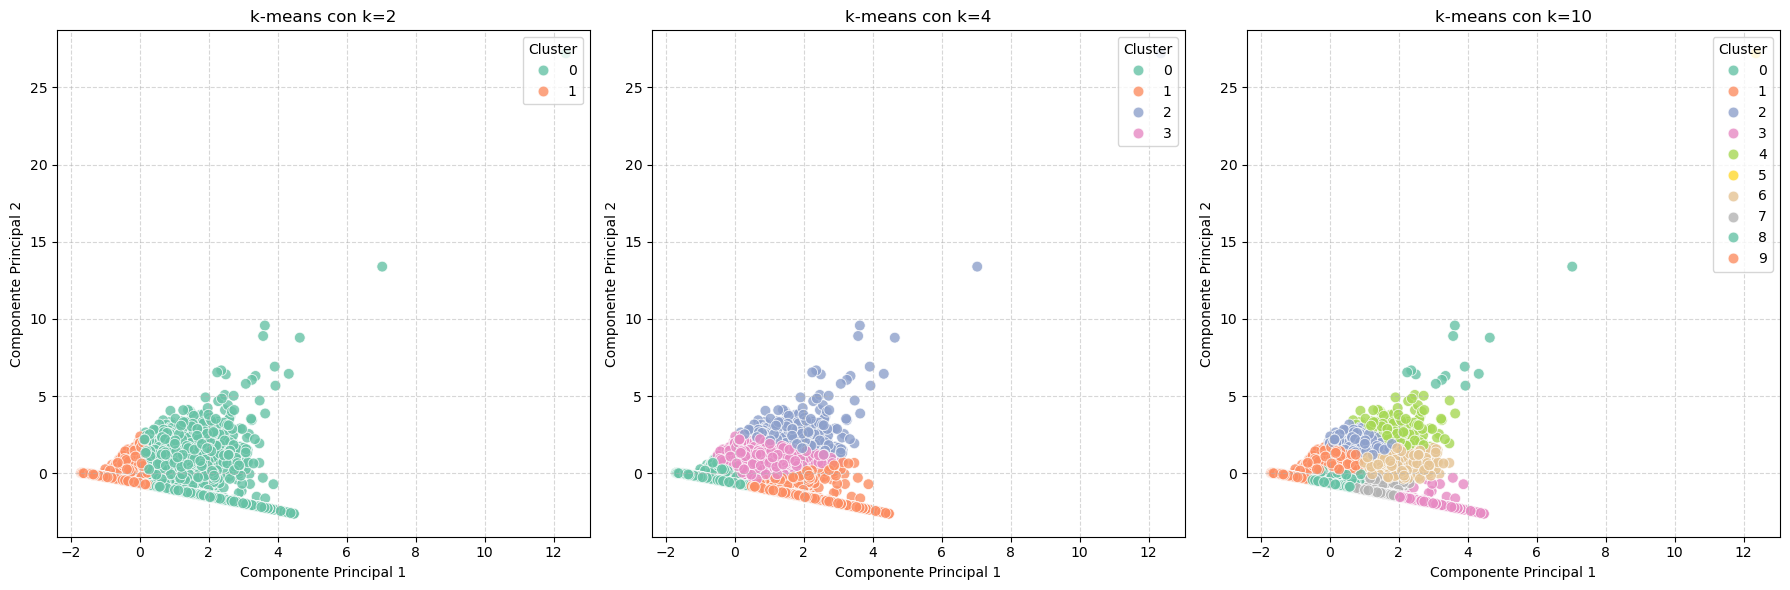

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Cargar el archivo
file_path = 'BASE_TP3_parte2.xlsx'
df = pd.read_excel(file_path)

# Seleccionar las variables para PCA
variables = ["edad", "edad2", "educ", "salario_semanal", "horastrab"]
df_selected = df[variables]

# Eliminar filas con valores NaN
df_clean = df_selected.dropna()

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear gráficos para k=2, k=4, k=10
k_values = [2, 4, 10]
plt.figure(figsize=(18, 6))

for i, k in enumerate(k_values):
    # Ajustar el modelo k-means
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    clusters = kmeans.fit_predict(X_pca)

    # Crear el gráfico de dispersión
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2", s=60, alpha=0.8)
    plt.title(f"k-means con k={k}")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(title="Cluster", loc="upper right")
    plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


En los gráficos de k-means, puedes ver cómo se agrupan los datos en diferentes cantidades de clusters (k=2, k=4, k=10):

k=2:

Solo dos grupos bien definidos.

El grupo más grande parece estar más disperso, mientras que el más pequeño es más compacto.

Esto sugiere que los datos tienen al menos dos grandes estructuras o subpoblaciones.

k=4:

Con cuatro clusters, se empieza a capturar más estructura interna.

Se observa una división más detallada, aunque algunos clusters siguen estando muy cercanos entre sí, indicando posible solapamiento.

k=10:

Aquí se ve una separación más fina.

Aunque algunos clusters siguen siendo compactos, otros parecen extenderse más, lo que podría ser un signo de sobreajuste (demasiados clusters para la estructura real de los datos).



In [ ]:
5b. Grafique edad y educ de los resultados de 𝑘 = 2 donde cada
punto tome dos colores, un color para ocupados y otro color para
desocupados. ¿Puede el algoritmo separar correctamente a las
personas ocupadas de las desocupadas? Comenten.

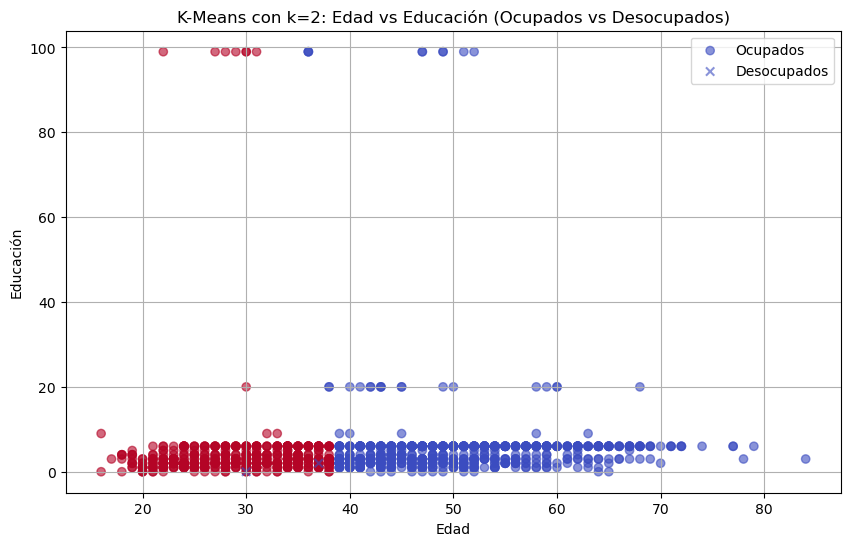

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargar el archivo Excel (ajustá el path si está en otra carpeta)
df = pd.read_excel("BASE_TP3_parte2.xlsx")

# Filtrar filas válidas con datos de edad, educ y ESTADO
df_filtered = df[['edad', 'educ', 'ESTADO']].dropna()

# Entrenamiento del modelo k-means con k=2
X = df_filtered[['edad', 'educ']]
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
df_filtered['cluster'] = kmeans.fit_predict(X)

# Muestra de seguridad para evitar problemas de memoria (opcional)
df_sample = df_filtered.sample(n=min(3000, len(df_filtered)), random_state=1)

# Separar por estado de ocupación
ocupados = df_sample[df_sample['ESTADO'] == 1]
desocupados = df_sample[df_sample['ESTADO'] == 0]

# Gráfico
plt.figure(figsize=(10, 6))

# Ocupados (círculos)
plt.scatter(ocupados['edad'], ocupados['educ'],
            c=ocupados['cluster'], cmap='coolwarm',
            marker='o', label='Ocupados', alpha=0.6)

# Desocupados (cruces)
plt.scatter(desocupados['edad'], desocupados['educ'],
            c=desocupados['cluster'], cmap='coolwarm',
            marker='x', label='Desocupados', alpha=0.6)

plt.xlabel("Edad")
plt.ylabel("Educación")
plt.title("K-Means con k=2: Edad vs Educación (Ocupados vs Desocupados)")
plt.legend()
plt.grid(True)
plt.show()


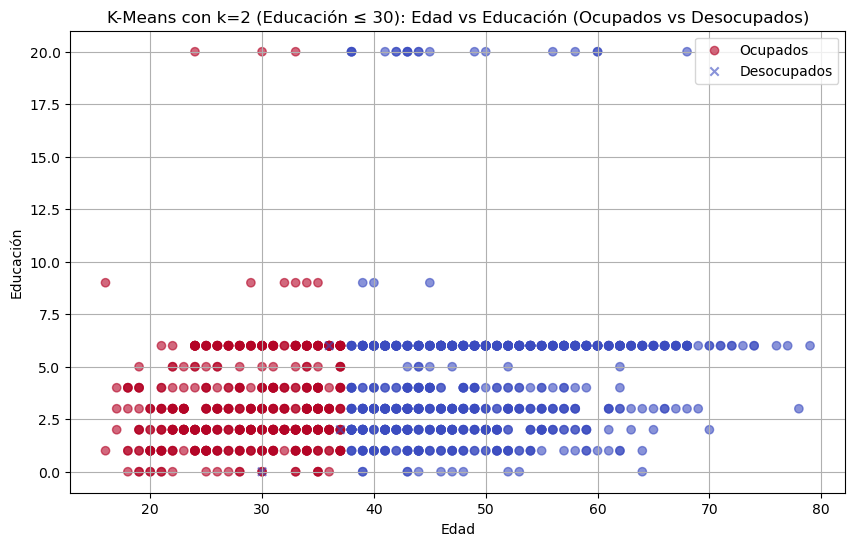

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargar el archivo Excel
df = pd.read_excel("BASE_TP3_parte2.xlsx")

# Filtrar filas con datos válidos y eliminar educación > 30
df_filtered = df[['edad', 'educ', 'ESTADO']].dropna()
df_filtered = df_filtered[df_filtered['educ'] <= 30]

# Entrenar k-means con k=2
X = df_filtered[['edad', 'educ']]
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
df_filtered['cluster'] = kmeans.fit_predict(X)

# Muestra de seguridad para evitar problemas de memoria (opcional)
df_sample = df_filtered.sample(n=min(3000, len(df_filtered)), random_state=1)

# Separar ocupados y desocupados
ocupados = df_sample[df_sample['ESTADO'] == 1]
desocupados = df_sample[df_sample['ESTADO'] == 0]

# Gráfico
plt.figure(figsize=(10, 6))

# Ocupados (círculos)
plt.scatter(ocupados['edad'], ocupados['educ'],
            c=ocupados['cluster'], cmap='coolwarm',
            marker='o', label='Ocupados', alpha=0.6)

# Desocupados (cruces)
plt.scatter(desocupados['edad'], desocupados['educ'],
            c=desocupados['cluster'], cmap='coolwarm',
            marker='x', label='Desocupados', alpha=0.6)

plt.xlabel("Edad")
plt.ylabel("Educación")
plt.title("K-Means con k=2 (Educación ≤ 30): Edad vs Educación (Ocupados vs Desocupados)")
plt.legend()
plt.grid(True)
plt.show()


Interpretación del gráfico 
Ejes (Edad vs Educación):

El eje X representa Edad en años

El eje Y muestra Educación. Lo acortamos hasta 30 porque no era razonable que alguien tenga 100 años de educación, seguramente es un error de la base de datos.

Colores (Ocupado vs Desocupado):

Los puntos rojos (0) son personas desocupadas.

Los puntos azules (1) son personas ocupadas.

Símbolos (Clusters):

Los puntos x y o representan los dos clusters formados por el algoritmo k-means con 
𝑘
=
2
k=2.

Posible Problema:

La distribución sugiere que el algoritmo no está separando bien a los ocupados de los desocupados. Esto es esperado si las características "edad" y "educ" no son suficientes para diferenciar ocupación, o si los datos tienen algún problema de escala o valores extremos.

6. Cluster jerárquico: utilizando las variables mencionadas arriba,
realicen un análisis de clustering jerárquico. Generen un dendograma
y expliquen brevemente qué es un dendograma.

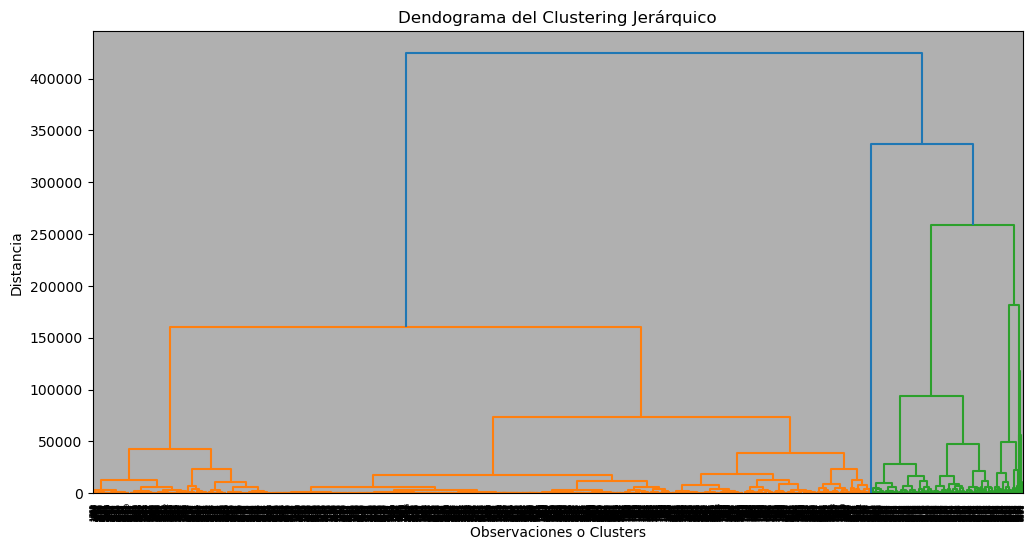

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Cargar el archivo Excel
df = pd.read_excel("BASE_TP3_parte2.xlsx")

# Seleccionar y limpiar las variables
vars_clustering = ["edad", "edad2", "educ", "salario_semanal", "horastrab"]
df_filtered = df[vars_clustering].dropna()
df_filtered = df_filtered[df_filtered["educ"] <= 30]

# Calcular la matriz de linkage con el método de Ward
Z = linkage(df_filtered, method='ward')

# Graficar el dendograma
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=30)  # Mostrar solo los primeros niveles
plt.title("Dendograma del Clustering Jerárquico")
plt.xlabel("Observaciones o Clusters")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()


Un dendograma es un gráfico en forma de árbol que muestra cómo se agrupan los datos a diferentes niveles de similitud. Cada rama representa un grupo y el nivel al que dos grupos se unen indica la distancia o disimilitud entre ellos. Es una forma buena para entender las estructuras ocultas en los datos.